# Read image from csv file

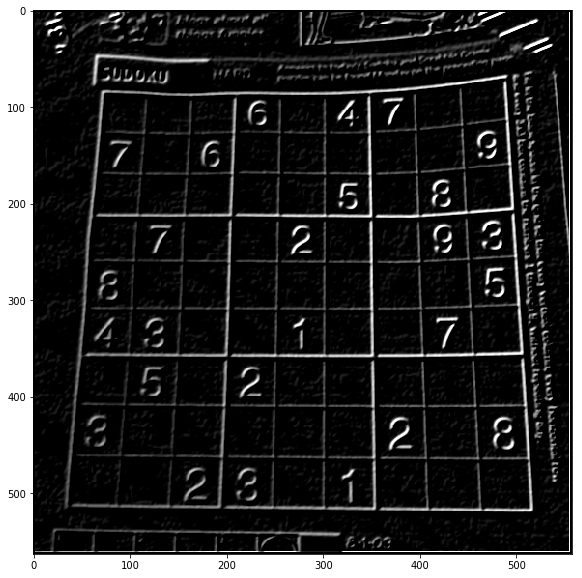

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_data = np.genfromtxt('./zybo/image_processed.csv', delimiter=',',dtype="uint8")
img_data = img_data.reshape((563, -1))

plt.figure(figsize=(10,10))
plt.imshow(img_data,cmap="gray")

# Run executable in visual studio and plot image

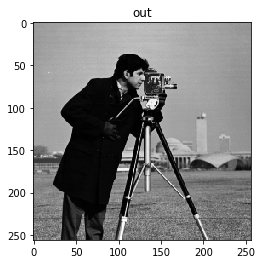

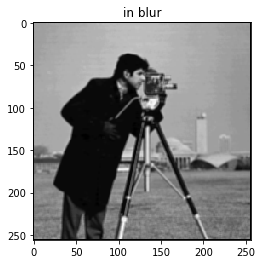

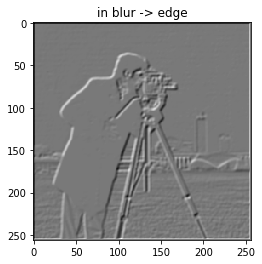

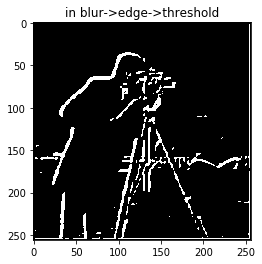

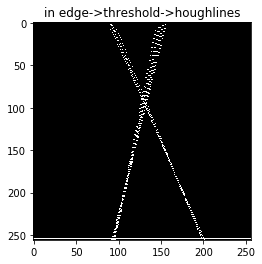

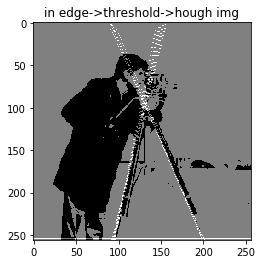

In [60]:
import scipy.misc
import struct
import os
rows = 256
cols = 256
baseDir = "./zybo/build/Debug/"
data_type = "int16"
struct_type = "@H"

#data = np.random.rand(50,50)
#data = scipy.misc.ascent()

#data = np.ones((5,10))*np.linspace(1,10,10)
data = cv.imread("./images/camera_man.png", cv.IMREAD_GRAYSCALE)

data = np.array(data,dtype=data_type).reshape(-1)

with open("in_file","wb") as f:
    for d in data:
        f.write(struct.pack(struct_type,d))

plt.figure()
plt.title("out")
plt.imshow(data.reshape(rows,-1),cmap="gray")

import subprocess
programPath = os.path.join(baseDir,"main.exe")
subprocess.call([programPath])


plt.figure()
plt.title("in blur")
inp = np.fromfile("out_file_blur",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.figure()
plt.title("in blur -> edge")
inp = np.fromfile("out_file_blur_edge",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.figure()
plt.title("in blur->edge->threshold")
inp = np.fromfile("out_file_threshold",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.figure()
plt.title("in edge->threshold->houghlines")
inp = np.fromfile("out_file_hough_lines",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")

plt.figure()
plt.title("in edge->threshold->hough img")
inp = np.fromfile("out_file_hough_img",dtype=data_type)
plt.imshow(inp.reshape(rows,cols),cmap="gray")